# Lead_Scoring_Case-Study

In [1]:
# filtering warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1. Reading & Understanding the Leads.csv-file

### 1.1 Importing the Leads.csv-file

In [3]:
leads= pd.read_csv('Leads.csv')

### 1.2 Examine the Leads.csv-file

In [4]:
# checking the top 5 rows of the Leads.csv-file

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# checking the shape

leads.shape

(9240, 37)

In [6]:
# checking the size

leads.size

341880

In [7]:
# checking numerical columns data distribution statistics

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# checking other Information

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 2. Data Quality: Missing-value,Duplicate-data and Checking Unique Value

- There are some columns with label "Select" which means customers was not selected any option.
- So it is better to replace it with null value.

In [9]:
# now replacing 'Select' label with null value.

leads=leads.replace('Select',np.nan)

In [10]:
# checking if there are columns with unique value=1, if any then drop it.

leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

- After seeing above we find that there are some columns with unique value = 1 are named as 'Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'

In [11]:
# Now dropping columns whose unique value=1

leads_1= leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                     'Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)
leads_1.shape

(9240, 32)

In [12]:
# checking the null value

leads_1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [13]:
# checking the percentage of missing value

(100*leads_1.isnull().sum()/len(leads_1)).round(2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
leads_2= leads_1.loc[:,leads_1.isnull().mean() < 0.30]

In [15]:
leads_2.shape

(9240, 22)

In [16]:
(100*leads_2.isnull().sum()/len(leads_2)).round(2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### 2.1 Imputating in categorical variables

#### 2.1.1 Country

In [17]:
# checking country columns value_counts

leads_2['Country'].value_counts().head()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: Country, dtype: int64

In [18]:
# missing value in 'Country' columns should be replace with label 'India' hence it has highest no. of occurence.

leads_2['Country']=leads_2['Country'].fillna('India')

#### 2.1.2 What is your current occupation

In [19]:
# checking 'What is your current occupation' columns value_counts

leads_2['What is your current occupation'].value_counts().head()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

In [20]:
# missing value 'What is your current occupation' columns should be replace label 'Unemployed' hence it has highest no. of occurence.

leads_2['What is your current occupation']=leads_2['What is your current occupation'].fillna('Unemployed')

#### 2.1.3 What matters most to you in choosing a course

In [21]:
# checking 'What matters most to you in choosing a course' columns value_counts

leads_2['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
# missing value 'What matters most to you in choosing a course' variable should be replace withlabel 'Better Career Prospects'

leads_2['What matters most to you in choosing a course']=leads_2['What matters most to you in choosing a course'].fillna('Better Career Prospects')

#### 2.1.4 Last Activity

In [23]:
# checking 'Last Activity' columns value_counts

leads_2['Last Activity'].value_counts().head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [24]:
# missing value 'What is your current occupation' variable should be replace with label 'Email Opened'

leads_2['Last Activity']=leads_2['Last Activity'].fillna('Email Opened')

#### 2.1.5 Lead Source

In [25]:
# checking 'Lead Source' columns value_counts

leads_2['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
blog                    1
welearnblog_Home        1
testone                 1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [26]:
# missing value 'Lead Source' columns should be replace with label 'Google'.
# And we seen above there is same label name 'Google' but in different format'google',
#so we to use capitalize function to correct it. 

leads_2['Lead Source']=leads_2['Lead Source'].fillna('Google')
leads_2['Lead Source']=leads_2['Lead Source'].apply(lambda x:x.capitalize())

In [27]:
leads_2['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Press_release           2
Live chat               2
Youtubechannel          1
Testone                 1
Blog                    1
Nc_edm                  1
Welearn                 1
Welearnblog_home        1
Pay per click ads       1
Name: Lead Source, dtype: int64

### 2.2 Imputating in numerical variables

#### 2.2.1 Page Views Per Visit

In [28]:
# checking 'Page Views Per Visit' columns value_counts

leads_2['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [29]:
# missing value 'Page Views Per Visit' variable should be replace with label '0.0'

leads_2['Page Views Per Visit']=leads_2['Page Views Per Visit'].fillna(0.0)

#### 2.2.2 TotalVisits

In [30]:
# checking 'TotalVisits' columns value_counts

leads_2['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [31]:
# missing value 'TotalVisits' variable should be replace with label '0.0'

leads_2['TotalVisits']=leads_2['TotalVisits'].fillna(0.0)

In [32]:
# now again checking missing value

(100*leads_2.isnull().sum()/len(leads_2)).round(2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### 2.3 Checking Duplicate value

In [33]:
# Checking duplicate value

leads_2_dup= leads_2

# now dropping duplicate data if any

leads_2_dup.drop_duplicates(subset=None, inplace =True)
leads_2_dup.shape

(9240, 22)

- After seeing above there is no duplicates data.
- We treated with all missing value.
- Now there is no missing value in any columns.
- Now we are good to go for our next analysis.

### 2.4 Cleaning of unused features.

In [34]:
# As we noticed that 'Prospect ID' & 'Lead Number' is of no use in our further analysis, its better to drop it.

leads_2.drop(['Prospect ID','Lead Number', 'Country'], axis=1, inplace=True)
leads_2.shape

(9240, 19)

## 3. Data Transformation

### 3.1 Converting binary variables (Yes/No) to (1/0)

In [35]:
# creating dictionary for Yes:1, No:2
category= {'Yes':1, 'No':0}

In [156]:
leads_2.head(2)

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


#### 3.1.1 Do Not Email

In [37]:
leads_2['Do Not Email']= leads_2['Do Not Email'].map(category)

In [38]:
leads_2['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

#### 3.1.2 Do Not Call

In [39]:
leads_2['Do Not Call']= leads_2['Do Not Call'].map(category)

In [40]:
leads_2['Do Not Call'].value_counts()

0    9238
1       2
Name: Do Not Call, dtype: int64

#### 3.1.3 Search	

In [41]:
leads_2['Search']= leads_2['Search'].map(category)

In [42]:
leads_2['Search'].value_counts()

0    9226
1      14
Name: Search, dtype: int64

#### 3.1.4 Newspaper Article	

In [43]:
leads_2['Newspaper Article']= leads_2['Newspaper Article'].map(category)

In [44]:
leads_2['Newspaper Article'].value_counts()

0    9238
1       2
Name: Newspaper Article, dtype: int64

#### 3.1.5 X Education Forums	

In [45]:
leads_2['X Education Forums']= leads_2['X Education Forums'].map(category)

In [46]:
leads_2['X Education Forums'].value_counts()

0    9239
1       1
Name: X Education Forums, dtype: int64

#### 3.1.6 Newspaper	

In [47]:
leads_2['Newspaper']= leads_2['Newspaper'].map(category)

In [48]:
leads_2['Newspaper'].value_counts()

0    9239
1       1
Name: Newspaper, dtype: int64

#### 3.1.7 Digital Advertisement	

In [49]:
leads_2['Digital Advertisement']= leads_2['Digital Advertisement'].map(category)

In [50]:
leads_2['Digital Advertisement'].value_counts()

0    9236
1       4
Name: Digital Advertisement, dtype: int64

#### 3.1.8 Through Recommendations	

In [51]:
leads_2['Through Recommendations']= leads_2['Through Recommendations'].map(category)

In [52]:
leads_2['Through Recommendations'].value_counts()

0    9233
1       7
Name: Through Recommendations, dtype: int64

#### 3.1.9 A free copy of Mastering The Interview

In [53]:
leads_2['A free copy of Mastering The Interview']= leads_2['A free copy of Mastering The Interview'].map(category)

In [54]:
leads_2['A free copy of Mastering The Interview'].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

### 3.2 Checking dtype of columns and if necessary convert it to required dtype

In [55]:
# checking dtype of columns

leads_2.select_dtypes('int64').columns

Index(['Do Not Email', 'Do Not Call', 'Converted',
       'Total Time Spent on Website', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [56]:
leads_2.select_dtypes('object').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [57]:
leads_2.select_dtypes('float').columns

Index(['TotalVisits', 'Page Views Per Visit'], dtype='object')

- After seeing above we find that columns 'TotalVisits', 'Page Views Per Visit' should not be float. So we convert it to int

In [58]:
# converting columns TotalVisits', 'Page Views Per Visit' from float to int

leads_2['TotalVisits']= leads_2['TotalVisits'].astype(int, errors='ignore')
leads_2['Page Views Per Visit' ]= leads_2['Page Views Per Visit' ].astype(int, errors='ignore')

In [59]:
leads_2.select_dtypes('integer').columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')

- Now dtypes is fine we go head for another steps.

## 4. Data Preparation

### 4.1 Dummy variables

#### 4.1.1 Creating Dummy Variables

In [60]:
# creating dummies variables

leads_dummy= pd.get_dummies(leads_2[['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity']],drop_first=True)

In [157]:
leads_dummy.head(2)

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4.1.2 Merging Dataframe

In [158]:
# now concate this dummy variables to original data set

leads_2=pd.concat([leads_2,leads_dummy], axis=1)
leads_2.head(2)

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
leads_2.shape

(9240, 80)

- As we have created the dummies variables for columns 
  - 'Lead Origin', 
  - 'Lead Source', 
  - 'Last Activity',
  - 'What is your current occupation',
  - 'What matters most to you in choosing a course',
  - 'Last Notable Activity'
  
- So now we remove this above original columns as it is of no use.

#### 4.1.3 Removing the Unnecessary Columns

In [64]:
duplicate= ['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 
            'What matters most to you in choosing a course', 'Last Notable Activity']

leads_2= leads_2.drop(duplicate,axis=1)

leads_2.shape

(9240, 74)

In [65]:
leads_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Do Not Email                                                             9240 non-null   int64
 1   Do Not Call                                                              9240 non-null   int64
 2   Converted                                                                9240 non-null   int64
 3   TotalVisits                                                              9240 non-null   int32
 4   Total Time Spent on Website                                              9240 non-null   int64
 5   Page Views Per Visit                                                     9240 non-null   int32
 6   Search                                                                   9240 non-null  

- We checked and treated missing value.
- We created binary variables.
- We checked data type foe all columns and converted 2 columns from float dtype to int.
- We have created dummies variables of few columns and removed original one.
- Now all variables are numerical except country columns. Now we move to our next step.

### 4.2. checking Outliers

#### 4.2.1 Checking Outliers in percentile

In [66]:
round(leads_2.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,...,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.26,0.00,0.00,0.00,0.00,...,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.17,0.04,0.01,0.01,0.01,...,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,3.00,248.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,5.00,936.00,3.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,1.00,0.00,1.00,10.00,1562.00,6.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
max,1.00,1.00,1.00,251.00,2272.00,55.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


- From the above we can see that there are outliers in two variables that's 'TotalVisits' and 'Page Views Per Visit'

#### 4.2.2 Checking Outliers through Plotting Boxplot

In [67]:
# lets plot boxplot to visualize outliers

def plots(col,x,y):
    plt.figure(figsize=(x,y))
    plt.subplot(1,1,1)
    sns.boxplot(col, data= leads_2)
    return

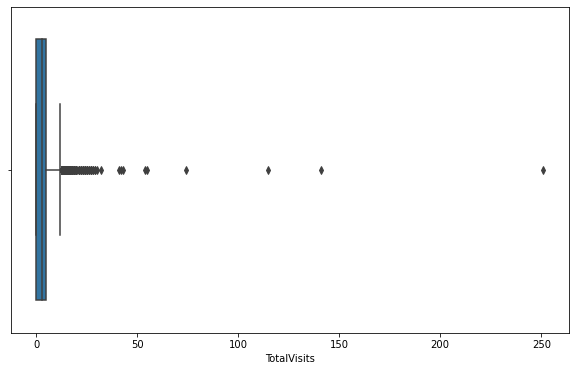

In [68]:
plots('TotalVisits', 10,6)

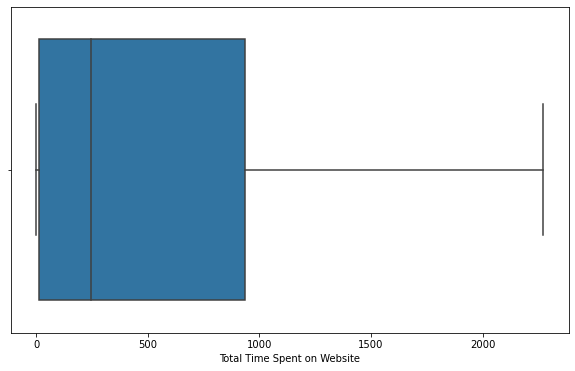

In [69]:
plots('Total Time Spent on Website', 10,6)

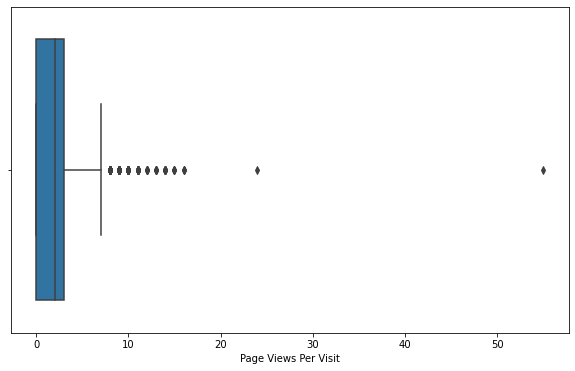

In [70]:
plots('Page Views Per Visit', 10,6)

- After seeing boxplot we can clearly find that there is 2 outliers variables that's 'TotalVisits' and 'Page Views per Visit'.
- But as per business requirement we cannot drop these outliers as it may impact our analysis/model.
- So we will create bins for these outliers.

#### 4.2.3 Creating Bins

##### 4.2.3.1 'TotalVisits'

In [71]:
# for 'TotalVisits' variables
# As we have range from 0 to 251 for 'TotalVisits' variables

range_totalvisits= {'TotalVisits_0_50' : 50, 'TotalVisits_50_100' : 100, 'TotalVisits_100_150' : 150, 
                    'TotalVisits_150_200' : 200, 'TotalVisits_200_250' : 250, 'TotalVisits_250_300' : 300}

# Assigning 1 and 0 to each bins

for i in range(len(list(range_totalvisits.keys()))):
    leads_2[list(range_totalvisits.keys())[i]]= leads_2['TotalVisits'].map(lambda x:1 if (x < list(range_totalvisits.values())[i] and
    x >= (list(range_totalvisits.values())[i] - 50)) else 0)

##### 4.2.3.2 'Page Views per Visit'

In [72]:
# for 'Page Views per Visit' variables
# As we have range from 0 to 55 for 'TotalVisits' variables

range_Page_Views_Per_Visit= {'Page Views Per Visit_0_10' : 10, 'Page Views Per Visit_10_20' : 20, 'Page Views Per Visit_20_30' : 30, 
                    'Page Views Per Visit_30_40' : 40, 'Page Views Per Visit_40_50' : 50, 'Page Views Per Visit_50_60' : 60}

# Assigning 1 and 0 to each bins

for i in range(len(list(range_Page_Views_Per_Visit.keys()))):
    leads_2[list(range_Page_Views_Per_Visit.keys())[i]]= leads_2['Page Views Per Visit'].map(lambda x:1 if (x < list(range_Page_Views_Per_Visit.values())[i] and
    x >= (list(range_Page_Views_Per_Visit.values())[i] - 10)) else 0)

- Now we have created a bins so we revove some redundant columns.

#### 4.2.4 Dropping Unnecessary Columns

In [73]:
leads_2= leads_2.drop(['TotalVisits', 'Page Views Per Visit','TotalVisits_200_250', 'TotalVisits_150_200', 'Page Views Per Visit_30_40', 'Page Views Per Visit_40_50'],
                    axis=1)
leads_2.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [74]:
leads_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 80 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Do Not Email                                                             9240 non-null   int64
 1   Do Not Call                                                              9240 non-null   int64
 2   Converted                                                                9240 non-null   int64
 3   Total Time Spent on Website                                              9240 non-null   int64
 4   Search                                                                   9240 non-null   int64
 5   Newspaper Article                                                        9240 non-null   int64
 6   X Education Forums                                                       9240 non-null  

## 5. Splitting the data into Train & Test Dataset

### 5.1 Split into Train & Test

In [75]:
leads_2_train, leads_2_test= train_test_split(leads_2, train_size=0.7, random_state=100)

In [76]:
leads_2_train.shape

(6468, 80)

In [77]:
leads_2_test.shape

(2772, 80)

In [78]:
leads_2_train.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.000309,0.381262,483.875850,0.001701,0.000309,0.000155,0.000155,0.000464,0.001082,...,0.004793,0.0,0.999227,0.000309,0.000309,0.000155,0.991806,0.007885,0.000155,0.000155
std,0.268799,0.017583,0.485734,546.565663,0.041207,0.017583,0.012434,0.012434,0.021533,0.032882,...,0.069069,0.0,0.027795,0.017583,0.017583,0.012434,0.090157,0.088453,0.012434,0.012434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,926.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Based on the split (70% - 30%) between train and test dataset we got 6468 rows in train dataset and 2772 rows in test dataset.

### 5.2 Scaling the dataset

In [79]:
# Scaling through StandardScaler

scaler= StandardScaler()

In [159]:
# datadrame before scaling

leads_2_train.head(2)

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [81]:
# Applying scaler() to all the columns except Yes/No and dummy variables

num_vars= ['Total Time Spent on Website']
leads_2_train[num_vars]= scaler.fit_transform(leads_2_train[num_vars])

In [82]:
leads_2_train.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,0,-0.885371,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0,0,0,0.005716,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3516,0,0,0,-0.691418,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,0,0,0,1.365219,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3934,0,0,0,-0.885371,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [83]:
leads_2_train.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
count,6468.000000,6468.000000,6468.000000,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.000309,0.381262,-1.609377e-16,0.001701,0.000309,0.000155,0.000155,0.000464,0.001082,...,0.004793,0.0,0.999227,0.000309,0.000309,0.000155,0.991806,0.007885,0.000155,0.000155
std,0.268799,0.017583,0.485734,1.000077e+00,0.041207,0.017583,0.012434,0.012434,0.021533,0.032882,...,0.069069,0.0,0.027795,0.017583,0.017583,0.012434,0.090157,0.088453,0.012434,0.012434
min,0.000000,0.000000,0.000000,-8.853708e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.634138e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,-4.352528e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,8.098906e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.271816e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5.3 Checking Conversion rate

In [84]:
# checking the conversion rate

100*(sum(leads_2_train['Converted'])/len(leads_2_train['Converted'].index))

38.12615955473098

- We have almost 39% of conversion rate

## 6. Building a Model

### 6.1 Dividing into X_train and y_train

In [85]:
X_train= leads_2_train
y_train= leads_2_train.pop('Converted')

### 6.2 RFE

In [86]:
logm= LogisticRegression()
logm.fit(X_train, y_train)

LogisticRegression()

In [87]:
# Running RFE with the o/p number of the variable equal to 20

rfe= RFE(logm,20)
rfe= rfe.fit(X_train, y_train)

In [88]:
# checking which parameter is selected in that list of 20

list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 20),
 ('Newspaper Article', False, 16),
 ('X Education Forums', False, 41),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 27),
 ('A free copy of Mastering The Interview', False, 56),
 ('Lead Origin_Landing Page Submission', False, 40),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Origin_Quick Add Form', False, 13),
 ('Lead Source_Blog', False, 25),
 ('Lead Source_Click2call', False, 33),
 ('Lead Source_Direct traffic', False, 19),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live chat', False, 46),
 ('Lead Source_Nc_edm', False, 11),
 ('Lead Source_Olark chat', True, 1),
 ('Lead Source_Organic search', False, 22),
 ('Lead Source_Pay per click ads', False, 43),
 ('Lead Source_Press_release', False, 37),
 ('Lead Source_Reference', Tr

In [89]:
# storing the selected 20 variables in col list

col= X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Digital Advertisement', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark chat', 'Lead Source_Reference',
       'Lead Source_Welingak website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website', 'TotalVisits_250_300'],
      dtype='object')

In [90]:
# checking which columns is eliminated

X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Blog',
       'Lead Source_Click2call', 'Lead Source_Direct traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live chat',
       'Lead Source_Nc_edm', 'Lead Source_Organic search',
       'Lead Source_Pay per click ads', 'Lead Source_Press_release',
       'Lead Source_Referral sites', 'Lead Source_Social media',
       'Lead Source_Testone', 'Lead Source_Welearn',
       'Lead Source_Welearnblog_home', 'Lead Source_Youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Acti

In [91]:
# creating X_train dataframe with RFE selected Variables

X_train_rfe= X_train[col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Newspaper,Digital Advertisement,Lead Origin_Lead Add Form,Lead Source_Olark chat,Lead Source_Reference,Lead Source_Welingak website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,TotalVisits_250_300
1871,0,-0.885371,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6795,0,0.005716,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3516,0,-0.691418,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8105,0,1.365219,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3934,0,-0.885371,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### 6.3 Building model using statsmodel

#### 6.3.1 Model1

In [92]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [93]:
logm = sm.GLM(y_train, X_train_rfe1, family= sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.7
Date:                Sat, 06 Feb 2021   Deviance:                       5359.5
Time:                        11:31:20   Pearson chi2:                 7.27e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0876      0.068      1.286      0.199      -0.046       0.221
Do Not Email                                            -1.2652      0.194     -6.534      0.000      -1.645      -0.886
Total Time Spent on Website                              1.0998      0.040     27.830      0.000       1.022       1.177
Newspaper                                              -24.0065   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Digital Advertisement                                  -21.9808   2.75e+04     -0.001      0.999   -5.39e+04    5.39e+04
Lead Origin_Lead Add Form                                3.2046      0.489      6.549      0.000       2.246       4.164
Lead Source_Olark chat                                   1.1369      0.102     11.109      0.000       0.936       1.337
Lead Source_Reference                                    0.5900      0.523      1.129      0.259      -0.435       1.615
Lead Source_Welingak website                             2.4921      0.869      2.868      0.004       0.789       4.195
Last Activity_Converted to Lead                         -1.0473      0.227     -4.623      0.000      -1.491      -0.603
Last Activity_Email Bounced                             -1.1286      0.345     -3.275      0.001      -1.804      -0.453
Last Activity_Olark Chat Conversation                   -1.2246      0.193     -6.329      0.000      -1.604      -0.845
What is your current occupation_Housewife               22.9145   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_Working Professional     2.7889      0.188     14.832      0.000       2.420       3.157
Last Notable Activity_Email Link Clicked                -1.9041      0.273     -6.981      0.000      -2.439      -1.369
Last Notable Activity_Email Opened                      -1.3200      0.087    -15.210      0.000      -1.490      -1.150
Last Notable Activity_Had a Phone Conversation           2.1312      1.099      1.939      0.053      -0.023       4.286
Last Notable Activity_Modified                          -1.6803      0.099    -16.942      0.000      -1.875      -1.486
Last Notable Activity_Olark Chat Conversation           -1.4311      0.374     -3.827      0.000      -2.164      -0.698
Last Notable Activity_Page Visited on Website           -1.6193      0.193     -8.410      0.000      -1.997      -1.242
TotalVisits_250_300                                     24.9729   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
========================================================================================================================
"""

#### Calculating VIF

In [94]:
# creating VIF dataframe
vif= pd.DataFrame()
vif['feature']= X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
4,Lead Origin_Lead Add Form,15.70
6,Lead Source_Reference,12.96
7,Lead Source_Welingak website,3.77
10,Last Activity_Olark Chat Conversation,1.99
16,Last Notable Activity_Modified,1.92
0,Do Not Email,1.81
9,Last Activity_Email Bounced,1.79
5,Lead Source_Olark chat,1.67
17,Last Notable Activity_Olark Chat Conversation,1.32
8,Last Activity_Converted to Lead,1.24


- As we seen above there are few variables with high VIF.
- So it is better to drop that variables as they not going help more in prediction.
- 'Lead Origin_Lead Add Form' has the highest variables, so start dropping it first. 

In [95]:
# dropping 'Lead Origin_Lead Add Form' as it has high VIF(15.70)

X_train_rfe=X_train_rfe.drop('Lead Origin_Lead Add Form', 1)

#### 6.3.2 Model 2

In [96]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [97]:
logm1 = sm.GLM(y_train, X_train_rfe1, family= sm.families.Binomial())
res1=logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.3
Date:                Sat, 06 Feb 2021   Deviance:                       5416.5
Time:                        11:31:21   Pearson chi2:                 7.20e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1352      0.068      2.002      0.045       0.003       0.267
Do Not Email                                            -1.1797      0.190     -6.222      0.000      -1.551      -0.808
Total Time Spent on Website                              1.0725      0.039     27.509      0.000       0.996       1.149
Newspaper                                              -23.9626   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Digital Advertisement                                  -22.0304   2.75e+04     -0.001      0.999   -5.39e+04    5.39e+04
Lead Source_Olark chat                                   1.0863      0.101     10.714      0.000       0.888       1.285
Lead Source_Reference                                    3.7346      0.204     18.325      0.000       3.335       4.134
Lead Source_Welingak website                             5.6239      0.724      7.766      0.000       4.205       7.043
Last Activity_Converted to Lead                         -1.0672      0.225     -4.737      0.000      -1.509      -0.626
Last Activity_Email Bounced                             -1.0905      0.339     -3.219      0.001      -1.754      -0.427
Last Activity_Olark Chat Conversation                   -1.2392      0.193     -6.425      0.000      -1.617      -0.861
What is your current occupation_Housewife               22.8902   1.38e+04      0.002      0.999    -2.7e+04     2.7e+04
What is your current occupation_Working Professional     2.7660      0.187     14.758      0.000       2.399       3.133
Last Notable Activity_Email Link Clicked                -1.9328      0.272     -7.113      0.000      -2.465      -1.400
Last Notable Activity_Email Opened                      -1.3449      0.086    -15.582      0.000      -1.514      -1.176
Last Notable Activity_Had a Phone Conversation           2.0718      1.098      1.886      0.059      -0.081       4.224
Last Notable Activity_Modified                          -1.6885      0.098    -17.149      0.000      -1.881      -1.495
Last Notable Activity_Olark Chat Conversation           -1.4296      0.372     -3.842      0.000      -2.159      -0.700
Last Notable Activity_Page Visited on Website           -1.6353      0.190     -8.588      0.000      -2.009      -1.262
TotalVisits_250_300                                     24.9195   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
========================================================================================================================
"""

#### calculating VIF

In [98]:
# creating VIF dataframe
vif= pd.DataFrame()
vif['feature']= X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
9,Last Activity_Olark Chat Conversation,1.99
15,Last Notable Activity_Modified,1.92
0,Do Not Email,1.81
8,Last Activity_Email Bounced,1.79
4,Lead Source_Olark chat,1.67
16,Last Notable Activity_Olark Chat Conversation,1.32
7,Last Activity_Converted to Lead,1.24
1,Total Time Spent on Website,1.20
5,Lead Source_Reference,1.18
11,What is your current occupation_Working Profes...,1.14


- Now if we see the VIF, it is below 2, So it is good to go.
- But if we see the p-value, there are some insignificant variables i.e p-value should be less than 5%(0.05),so it is good to drop that variables one by one and creating model again and again upto final model

In [99]:
# dropping 'Newspaper' as it has p-value(1.000)

X_train_rfe=X_train_rfe.drop('Newspaper', 1)

#### 6.3.3 Model 3

In [100]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_rfe1, family= sm.families.Binomial())
res2=logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.9
Date:                Sat, 06 Feb 2021   Deviance:                       5419.7
Time:                        11:31:22   Pearson chi2:                 7.19e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1355      0.067      2.008      0.045       0.003       0.268
Do Not Email                                            -1.1797      0.190     -6.224      0.000      -1.551      -0.808
Total Time Spent on Website                              1.0700      0.039     27.481      0.000       0.994       1.146
Digital Advertisement                                  -22.0313   2.75e+04     -0.001      0.999   -5.39e+04    5.39e+04
Lead Source_Olark chat                                   1.0848      0.101     10.702      0.000       0.886       1.283
Lead Source_Reference                                    3.7329      0.204     18.319      0.000       3.333       4.132
Lead Source_Welingak website                             5.6219      0.724      7.764      0.000       4.203       7.041
Last Activity_Converted to Lead                         -1.0669      0.225     -4.737      0.000      -1.508      -0.625
Last Activity_Email Bounced                             -1.0894      0.339     -3.217      0.001      -1.753      -0.426
Last Activity_Olark Chat Conversation                   -1.2401      0.193     -6.431      0.000      -1.618      -0.862
What is your current occupation_Housewife               22.8908   1.38e+04      0.002      0.999    -2.7e+04     2.7e+04
What is your current occupation_Working Professional     2.7665      0.187     14.764      0.000       2.399       3.134
Last Notable Activity_Email Link Clicked                -1.9329      0.272     -7.115      0.000      -2.465      -1.400
Last Notable Activity_Email Opened                      -1.3470      0.086    -15.611      0.000      -1.516      -1.178
Last Notable Activity_Had a Phone Conversation           2.0705      1.098      1.885      0.059      -0.082       4.223
Last Notable Activity_Modified                          -1.6877      0.098    -17.149      0.000      -1.881      -1.495
Last Notable Activity_Olark Chat Conversation           -1.4279      0.372     -3.839      0.000      -2.157      -0.699
Last Notable Activity_Page Visited on Website           -1.6344      0.190     -8.587      0.000      -2.007      -1.261
TotalVisits_250_300                                     24.9164   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
========================================================================================================================
"""

In [101]:
# dropping 'Digital Advertisement' as it has p-value(0.999)

X_train_rfe=X_train_rfe.drop('Digital Advertisement', 1)

#### 6.3.4 Model 4

In [102]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train, X_train_rfe1, family= sm.families.Binomial())
res3=logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.3
Date:                Sat, 06 Feb 2021   Deviance:                       5422.5
Time:                        11:31:22   Pearson chi2:                 7.20e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1315      0.067      1.952      0.051      -0.001       0.264
Do Not Email                                            -1.1770      0.190     -6.210      0.000      -1.549      -0.806
Total Time Spent on Website                              1.0708      0.039     27.502      0.000       0.995       1.147
Lead Source_Olark chat                                   1.0873      0.101     10.727      0.000       0.889       1.286
Lead Source_Reference                                    3.7353      0.204     18.331      0.000       3.336       4.135
Lead Source_Welingak website                             5.6244      0.724      7.767      0.000       4.205       7.044
Last Activity_Converted to Lead                         -1.0649      0.225     -4.727      0.000      -1.506      -0.623
Last Activity_Email Bounced                             -1.0898      0.339     -3.218      0.001      -1.754      -0.426
Last Activity_Olark Chat Conversation                   -1.2391      0.193     -6.425      0.000      -1.617      -0.861
What is your current occupation_Housewife               22.8919   1.38e+04      0.002      0.999    -2.7e+04     2.7e+04
What is your current occupation_Working Professional     2.7678      0.187     14.771      0.000       2.401       3.135
Last Notable Activity_Email Link Clicked                -1.9300      0.272     -7.104      0.000      -2.462      -1.397
Last Notable Activity_Email Opened                      -1.3438      0.086    -15.582      0.000      -1.513      -1.175
Last Notable Activity_Had a Phone Conversation           2.0747      1.098      1.889      0.059      -0.078       4.227
Last Notable Activity_Modified                          -1.6864      0.098    -17.143      0.000      -1.879      -1.494
Last Notable Activity_Olark Chat Conversation           -1.4269      0.372     -3.836      0.000      -2.156      -0.698
Last Notable Activity_Page Visited on Website           -1.6314      0.190     -8.570      0.000      -2.004      -1.258
TotalVisits_250_300                                     24.9180   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
========================================================================================================================
"""

In [103]:
# dropping 'What is your current occupation_Housewife' as it has p-value(.999)

X_train_rfe=X_train_rfe.drop('What is your current occupation_Housewife', 1)

#### 6.3.5 Model 5

In [104]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train, X_train_rfe1, family= sm.families.Binomial())
res4=logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.3
Date:                Sat, 06 Feb 2021   Deviance:                       5436.5
Time:                        11:31:22   Pearson chi2:                 7.22e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1328      0.067      1.970      0.049       0.001       0.265
Do Not Email                                            -1.1800      0.190     -6.226      0.000      -1.552      -0.809
Total Time Spent on Website                              1.0699      0.039     27.510      0.000       0.994       1.146
Lead Source_Olark chat                                   1.0808      0.101     10.676      0.000       0.882       1.279
Lead Source_Reference                                    3.7538      0.203     18.455      0.000       3.355       4.152
Lead Source_Welingak website                             5.6167      0.724      7.757      0.000       4.198       7.036
Last Activity_Converted to Lead                         -1.0738      0.225     -4.770      0.000      -1.515      -0.633
Last Activity_Email Bounced                             -1.0928      0.339     -3.226      0.001      -1.757      -0.429
Last Activity_Olark Chat Conversation                   -1.2450      0.193     -6.458      0.000      -1.623      -0.867
What is your current occupation_Working Professional     2.7621      0.187     14.741      0.000       2.395       3.129
Last Notable Activity_Email Link Clicked                -1.9118      0.269     -7.102      0.000      -2.439      -1.384
Last Notable Activity_Email Opened                      -1.3378      0.086    -15.526      0.000      -1.507      -1.169
Last Notable Activity_Had a Phone Conversation           2.0731      1.098      1.888      0.059      -0.079       4.225
Last Notable Activity_Modified                          -1.6775      0.098    -17.082      0.000      -1.870      -1.485
Last Notable Activity_Olark Chat Conversation           -1.4178      0.372     -3.812      0.000      -2.147      -0.689
Last Notable Activity_Page Visited on Website           -1.6312      0.190     -8.571      0.000      -2.004      -1.258
TotalVisits_250_300                                     22.9158   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
========================================================================================================================
"""

In [105]:
# dropping 'TotalVisits_250_300' as it has p-value(.999)

X_train_rfe=X_train_rfe.drop('TotalVisits_250_300', 1)

#### 6.3.6 Model 6

In [106]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
logm5 = sm.GLM(y_train, X_train_rfe1, family= sm.families.Binomial())
res5=logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.7
Date:                Sat, 06 Feb 2021   Deviance:                       5441.4
Time:                        11:31:23   Pearson chi2:                 7.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1336      0.067      1.983      0.047       0.002       0.266
Do Not Email                                            -1.1826      0.189     -6.243      0.000      -1.554      -0.811
Total Time Spent on Website                              1.0680      0.039     27.485      0.000       0.992       1.144
Lead Source_Olark chat                                   1.0778      0.101     10.651      0.000       0.879       1.276
Lead Source_Reference                                    3.7511      0.203     18.444      0.000       3.353       4.150
Lead Source_Welingak website                             5.6139      0.724      7.753      0.000       4.195       7.033
Last Activity_Converted to Lead                         -1.0738      0.225     -4.771      0.000      -1.515      -0.633
Last Activity_Email Bounced                             -1.0896      0.339     -3.218      0.001      -1.753      -0.426
Last Activity_Olark Chat Conversation                   -1.2448      0.193     -6.459      0.000      -1.623      -0.867
What is your current occupation_Working Professional     2.7603      0.187     14.735      0.000       2.393       3.127
Last Notable Activity_Email Link Clicked                -1.9116      0.269     -7.102      0.000      -2.439      -1.384
Last Notable Activity_Email Opened                      -1.3375      0.086    -15.529      0.000      -1.506      -1.169
Last Notable Activity_Had a Phone Conversation           2.0715      1.098      1.887      0.059      -0.081       4.224
Last Notable Activity_Modified                          -1.6770      0.098    -17.082      0.000      -1.869      -1.485
Last Notable Activity_Olark Chat Conversation           -1.4165      0.372     -3.810      0.000      -2.145      -0.688
Last Notable Activity_Page Visited on Website           -1.6015      0.189     -8.465      0.000      -1.972      -1.231
========================================================================================================================
"""

In [107]:
# dropping 'Last Notable Activity_Had a Phone Conversation' as it has p-value(.059)

X_train_rfe=X_train_rfe.drop('Last Notable Activity_Had a Phone Conversation', 1)

#### 6.3.7 Model 7

In [108]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
logm6 = sm.GLM(y_train, X_train_rfe1, family= sm.families.Binomial())
res6=logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2723.3
Date:                Sat, 06 Feb 2021   Deviance:                       5446.5
Time:                        11:31:23   Pearson chi2:                 7.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1466      0.067      2.184      0.029       0.015       0.278
Do Not Email                                            -1.1903      0.189     -6.284      0.000      -1.562      -0.819
Total Time Spent on Website                              1.0659      0.039     27.464      0.000       0.990       1.142
Lead Source_Olark chat                                   1.0715      0.101     10.597      0.000       0.873       1.270
Lead Source_Reference                                    3.7462      0.203     18.419      0.000       3.348       4.145
Lead Source_Welingak website                             5.6085      0.724      7.745      0.000       4.189       7.028
Last Activity_Converted to Lead                         -1.0747      0.225     -4.777      0.000      -1.516      -0.634
Last Activity_Email Bounced                             -1.0866      0.339     -3.209      0.001      -1.750      -0.423
Last Activity_Olark Chat Conversation                   -1.2435      0.193     -6.453      0.000      -1.621      -0.866
What is your current occupation_Working Professional     2.7586      0.187     14.727      0.000       2.391       3.126
Last Notable Activity_Email Link Clicked                -1.9221      0.269     -7.144      0.000      -2.450      -1.395
Last Notable Activity_Email Opened                      -1.3488      0.086    -15.683      0.000      -1.517      -1.180
Last Notable Activity_Modified                          -1.6875      0.098    -17.209      0.000      -1.880      -1.495
Last Notable Activity_Olark Chat Conversation           -1.4263      0.372     -3.838      0.000      -2.155      -0.698
Last Notable Activity_Page Visited on Website           -1.6122      0.189     -8.526      0.000      -1.983      -1.242
========================================================================================================================
"""

- We removed all insignificant variables.

#### Calculating VIF

In [109]:
# creating VIF dataframe
vif= pd.DataFrame()
vif['feature']= X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
7,Last Activity_Olark Chat Conversation,1.99
11,Last Notable Activity_Modified,1.92
0,Do Not Email,1.81
6,Last Activity_Email Bounced,1.79
2,Lead Source_Olark chat,1.67
12,Last Notable Activity_Olark Chat Conversation,1.32
5,Last Activity_Converted to Lead,1.24
1,Total Time Spent on Website,1.20
3,Lead Source_Reference,1.17
8,What is your current occupation_Working Profes...,1.14


**Conclusion for final model(model7)**
  - In this model p-value for all variables is below 5%(0.05)
  - In this model VIF value is less than 2.
  - Now this model is good to go for further steps.

### 6.4 Predicting value on the train set

In [110]:
# Getting the predicted values on the train set

y_train_pred= res6.predict(X_train_rfe1)
y_train_pred[:10]

1871    0.254566
6795    0.232171
3516    0.295738
8105    0.832261
3934    0.195732
4844    0.992541
3297    0.121308
8071    0.990854
987     0.122401
7423    0.904752
dtype: float64

In [111]:
y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25456609, 0.2321714 , 0.29573806, 0.83226085, 0.19573196,
       0.99254081, 0.1213078 , 0.99085354, 0.12240149, 0.90475222])

#### 6.4.1 Creating a dataframe with the actual converted flag and predicted probabilities

In [112]:
y_train_pred_final= pd.DataFrame({'Converted':y_train, 'Converted_prob':y_train_pred})
y_train_pred_final['CusID']= y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,CusID
1871,0,0.254566,1871
6795,0,0.232171,6795
3516,0,0.295738,3516
8105,0,0.832261,8105
3934,0,0.195732,3934


#### 6.4.2 Creating new columns 'Predicted' with 1 if 'Converted_prob' >0.5 else 0

In [113]:
y_train_pred_final['Predicted']= y_train_pred_final.Converted_prob.map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,CusID,Predicted
1871,0,0.254566,1871,0
6795,0,0.232171,6795,0
3516,0,0.295738,3516,0
8105,0,0.832261,8105,1
3934,0,0.195732,3934,0


In [114]:
#Now we use confusion metrics

confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3555,  447],
       [ 752, 1714]], dtype=int64)

In [115]:
# Lets check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.814625850340136

### 6.5 Metrics beyond simply accuracy

In [116]:
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

In [117]:
# lets check sensitivity of our logistic regression model

TP/float(TP+FN)

0.6950527169505272

In [118]:
# lets check specificity of our logistic regression model

TN/float(TN+FP)

0.8883058470764618

In [119]:
# calculate false positive rate

FP/float(TN+FP)

0.11169415292353824

In [120]:
# calculate positive predictive value

TP/float(TP+FP)

0.7931513188338732

In [121]:
# calculate negative predictive value

TN/float(TN+FN)

0.825400510796378

## 7. Plotting the ROC Curve

In [122]:
# creating a function to plot roc curve with auc score

def leads_roc(actual, probs):
    fpr, tpr, thresholds= roc_curve(actual, probs, drop_intermediate=False) # (creating roc_curve value)
    auc_score= roc_auc_score(actual, probs) # (calculating the auc score(area under the curve))
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label='ROC Curve(area= %0.2f)' % auc_score) # (plotting the roc_curve)
    plt.plot([0,1], [0,1], 'r--') # plotting the 45% dotted line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    return None

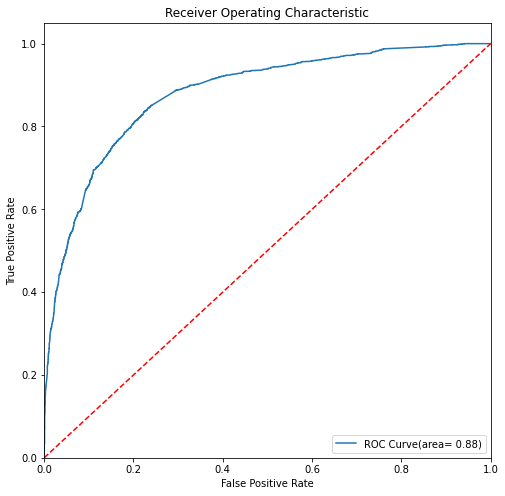

In [123]:
leads_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

**Point to be concluded from the above curve**
- The curve is closer to the left side of the border of the roc curve than to the right urve. Hence our model is having     great accuracy.
- The area under the curve is 88% of the total area.

## 8. Finding Optimal Cut-Off Point.

In [124]:
# Lets create columns with different probability cut-offs

numbers= [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,CusID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.254566,1871,0,1,1,1,0,0,0,0,0,0,0
6795,0,0.232171,6795,0,1,1,1,0,0,0,0,0,0,0
3516,0,0.295738,3516,0,1,1,1,0,0,0,0,0,0,0
8105,0,0.832261,8105,1,1,1,1,1,1,1,1,1,1,0
3934,0,0.195732,3934,0,1,1,0,0,0,0,0,0,0,0


In [125]:
# Now let's calculate accuracy sensitivity and specificity for various probability cut-offs.

cutoff_df = pd.DataFrame(columns= ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1= sum(sum(cm1))
    Accuracy= (cm1[0,0] + cm1[1,1])/total1
    
    Specificity= cm1[0,0]/(cm1[0,0] + cm1[0,1])
    Sensitivity= cm1[1,1]/(cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, Accuracy, Sensitivity, Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.573902     0.969586     0.330085
0.2          0.2  0.752474     0.901460     0.660670
0.3          0.3  0.798237     0.837388     0.774113
0.4          0.4  0.809215     0.764396     0.836832
0.5          0.5  0.814626     0.695053     0.888306
0.6          0.6  0.796382     0.584347     0.927036
0.7          0.7  0.779375     0.502433     0.950025
0.8          0.8  0.755720     0.404704     0.972014
0.9          0.9  0.713358     0.266423     0.988756


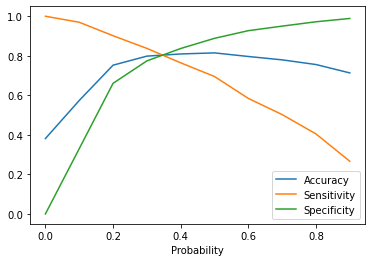

In [126]:
# Let's plot Accuracy,  Sensitivity,  Specificity for various probabilities.

cutoff_df.plot.line(x='Probability', y= ['Accuracy',  'Sensitivity',  'Specificity'])
plt.show()

- From the above curve, near 0.4 is the optimum point to take it as a cutoff probability.

In [127]:
y_train_pred_final['Predicted_final']= y_train_pred_final.Converted_prob.map(lambda x : 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,CusID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_final
1871,0,0.254566,1871,0,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.232171,6795,0,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.295738,3516,0,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.832261,8105,1,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.195732,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [128]:
#Now we use confusion metrics

confusion2= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)
confusion2

array([[3349,  653],
       [ 581, 1885]], dtype=int64)

In [129]:
# Lets check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)

0.8092145949288806

### 7.1 Metrics beyond simply accuracy

In [130]:
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

In [131]:
# lets check sensitivity of our logistic regression model

TP/float(TP+FN)

0.6950527169505272

In [132]:
# lets check specificity of our logistic regression model

TN/float(TN+FP)

0.8883058470764618

In [133]:
# calculate false positive rate

FP/float(TN+FP)

0.11169415292353824

In [134]:
# calculate positive predictive value

TP/float(TP+FP)

0.7931513188338732

In [135]:
# calculate negative predictive value

TN/float(TN+FN)

0.825400510796378

## 8. Precision And Recall

In [136]:
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3555,  447],
       [ 752, 1714]], dtype=int64)

### 8.1 Precision

- TP / (TP + FP)

In [137]:
confusion[1,1] / (confusion[0,1] + confusion[1,1])

0.7931513188338732

### 8.2 Recall

- TP / (TP + FN)

In [138]:
confusion[1,1] / (confusion[1,0] + confusion[1,1])

0.6950527169505272

**Important point to be noted from the outcomes for Precision and recall are:**
- Our precision percentage is approximately 79%.
- And our recall percentage is approximately 69%.
- This means that we have a good model with relevancy of 79% and tru relevant result of 69%.

## 9. Precision And Recall Trade-off

- As we all know that Precision and Recall are inversely related which means if one increases the other will decreases.
- Hence we need to see the trade-off b/w these two.

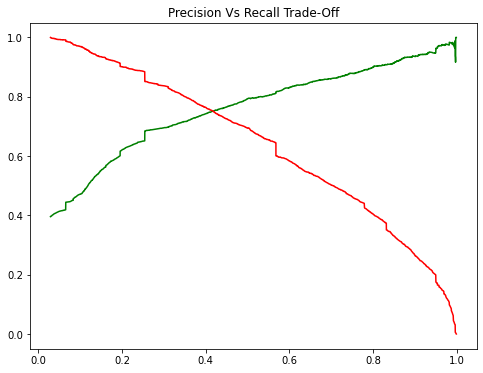

In [139]:
# creating precision recall curve plotting

p,r,thresholds= precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob )
plt.figure(figsize=(8,6))
plt.title('Precision Vs Recall Trade-Off')
plt.plot(thresholds,p[:-1], 'g-')
plt.plot(thresholds,r[:-1], 'r-')
plt.show()

- As we see that there is a trade-off between Precision and Recall and meeting points is nearby at 0.4

## 10. Making prediction on the Test set

### 10.1 Test Data-Set

In [140]:
leads_2_test.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
4269,0,0,1,1011,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2376,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7766,0,0,1,59,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9199,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4359,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [141]:
leads_2_test.shape

(2772, 80)

In [142]:
leads_2_test.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
count,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.0,2772.0,2772.0,2772.000000,2772.0,...,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.0,2772.000000,2772.000000,2772.0,2772.0
mean,0.081890,0.0,0.395022,496.617244,0.001082,0.0,0.0,0.0,0.000361,0.0,...,0.005772,0.000361,0.999639,0.000361,0.0,0.0,0.992063,0.007937,0.0,0.0
std,0.274247,0.0,0.488944,551.399285,0.032886,0.0,0.0,0.0,0.018993,0.0,...,0.075768,0.018993,0.018993,0.018993,0.0,0.0,0.088749,0.088749,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
25%,0.000000,0.0,0.000000,13.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0
50%,0.000000,0.0,0.000000,258.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0
75%,0.000000,0.0,1.000000,949.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0
max,1.000000,0.0,1.000000,2253.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,0.0


### 10.2 Scaling the test data-set

In [143]:
# Applying scaler() to all the columns except Yes/No and dummy variables

num_vars1= ['Total Time Spent on Website']
leads_2_test[num_vars1]= scaler.transform(leads_2_test[num_vars1])

In [144]:
leads_2_test.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
4269,0,0,1,0.964504,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2376,0,0,1,-0.885371,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7766,0,0,1,-0.777416,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9199,0,0,0,-0.885371,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4359,0,0,1,-0.885371,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [145]:
leads_2_test.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
count,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.0,2772.0,2772.0,2772.000000,2772.0,...,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.0,2772.000000,2772.000000,2772.0,2772.0
mean,0.081890,0.0,0.395022,0.023314,0.001082,0.0,0.0,0.0,0.000361,0.0,...,0.005772,0.000361,0.999639,0.000361,0.0,0.0,0.992063,0.007937,0.0,0.0
std,0.274247,0.0,0.488944,1.008922,0.032886,0.0,0.0,0.0,0.018993,0.0,...,0.075768,0.018993,0.018993,0.018993,0.0,0.0,0.088749,0.088749,0.0,0.0
min,0.000000,0.0,0.000000,-0.885371,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
25%,0.000000,0.0,0.000000,-0.861584,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0
50%,0.000000,0.0,0.000000,-0.413296,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0
75%,0.000000,0.0,1.000000,0.851060,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0
max,1.000000,0.0,1.000000,3.237051,1.000000,0.0,0.0,0.0,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,0.0


In [146]:
# checking the conversion rate

100*(sum(leads_2_test['Converted'])/len(leads_2_test['Converted'].index))

39.5021645021645

### 10.3 Dividing into X_test and y_test

In [147]:
X_test= leads_2_test
y_test= leads_2_test.pop('Converted')

In [148]:
X_test.head(2)

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
4269,0,0,0.964504,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2376,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


### 10.4 Now Predicting

In [161]:
# predicting the test dataset with our final train model

test_cols= X_train_rfe.columns
X_test_1= X_test[test_cols]
X_test_2= sm.add_constant(X_test_1)
y_test_pred= res6.predict(X_test_2)
y_test_pred[:5]

4269    0.763980
2376    0.950221
7766    0.888605
9199    0.065575
4359    0.832064
dtype: float64

In [160]:
# creating a new dataframe and saving the prediction in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test_pred, 'CusId': y_test.index})
y_test_pred_final.head(2)

,Converted,Converted_prob,CusId
4269,1,0.763980,4269
2376,1,0.950221,2376


### 10.5 Model Evaluation

In [151]:
y_test_pred_final['Predicted_final']= y_test_pred_final.Converted_prob.map(lambda x :1 if x > 0.4 else 0)
y_test_pred_final.head()

,Converted,Converted_prob,CusId,Predicted_final
4269,1,0.763980,4269,1
2376,1,0.950221,2376,1
7766,1,0.888605,7766,1
9199,0,0.065575,9199,0
4359,1,0.832064,4359,1


In [152]:
# lets check overall accuracy

metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted_final)

0.8152958152958153

In [153]:
# printing precision_score

print('precision_score is:', precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted_final))

# printing recall_score

print('recall_score is:', recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted_final))

precision_score is: 0.7681692732290708
recall_score is: 0.7625570776255708


## 11. Lead Score Assigning

In [154]:
# creating new columns with lead number and lead score

y_test_pred_final['Lead_Number']= leads.iloc[y_test_pred_final['CusId'],1]
y_test_pred_final['Lead_Score']= y_test_pred_final.Converted_prob.map(lambda x : round(x*100))

In [155]:
y_test_pred_final.head()

,Converted,Converted_prob,CusId,Predicted_final,Lead_Number,Lead_Score
4269,1,0.763980,4269,1,619003,76
2376,1,0.950221,2376,1,636884,95
7766,1,0.888605,7766,1,590281,89
9199,0,0.065575,9199,0,579892,7
4359,1,0.832064,4359,1,617929,83


# Conclusion

- Accuray(82%), Precision_Score(77%) and Recall_Score(76%) we got from test set in aceptable range.
- In business terms, this model has an ability to adjust with the company requirements in coming future.
- Model is in stable state.

**Important features responsible for good conversion rate are:**
- Lead Source_Welingak website
- Lead Source_Reference
- What is your current occupation_Working Professional
